# Description (плотность возбуждённых состояний атомных ядер)
1. Определяем квантовые числа n1, n2, n3 состояний (и основных, и возбуждённых), а также спин и энергию.
2. Сортируем по энергии.
3. Алгоритм перебора всевозможных состояний.
4. Получаем результат. Сколько возбуждённых состояний в данном интервале энергии.

Не могу полностью понять, как работает этот алгоритм. Запутался в индексах... Всё выдаёт правильно, можно отследить с помощью массива T (другой файл, но алгоритм тот же).

In [36]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import math
from math import comb as c

In [2]:
N = 20
LST = []
Etot = 0
level_count = 0 
n1 = 1
n2 = 1
n3 = 1
for n1 in range(1, 33):
    for n2 in range(1, 33):
        for n3 in range(1, 33):
            E = n1**2 + n2**2 + n3**2
            if E <= 40:
                Etot += 2*E
                level_count += 2
                LST.append([[n1, n2, n3], '+', E])
                LST.append([[n1, n2, n3], '-', E])
print('Etot', Etot, 'level_count', level_count)

Etot 4362 level_count 174


In [3]:
def custom_key0(k):
    return k[0]

def custom_key1(k):
    return k[1]

def custom_key2(k):
    return k[2]

LST.sort(key=custom_key0)
LST.sort(key=custom_key2)
level_count = 0
for i in LST:
    level_count += 1
    print(level_count, i)

1 [[1, 1, 1], '+', 3]
2 [[1, 1, 1], '-', 3]
3 [[1, 1, 2], '+', 6]
4 [[1, 1, 2], '-', 6]
5 [[1, 2, 1], '+', 6]
6 [[1, 2, 1], '-', 6]
7 [[2, 1, 1], '+', 6]
8 [[2, 1, 1], '-', 6]
9 [[1, 2, 2], '+', 9]
10 [[1, 2, 2], '-', 9]
11 [[2, 1, 2], '+', 9]
12 [[2, 1, 2], '-', 9]
13 [[2, 2, 1], '+', 9]
14 [[2, 2, 1], '-', 9]
15 [[1, 1, 3], '+', 11]
16 [[1, 1, 3], '-', 11]
17 [[1, 3, 1], '+', 11]
18 [[1, 3, 1], '-', 11]
19 [[3, 1, 1], '+', 11]
20 [[3, 1, 1], '-', 11]
21 [[2, 2, 2], '+', 12]
22 [[2, 2, 2], '-', 12]
23 [[1, 2, 3], '+', 14]
24 [[1, 2, 3], '-', 14]
25 [[1, 3, 2], '+', 14]
26 [[1, 3, 2], '-', 14]
27 [[2, 1, 3], '+', 14]
28 [[2, 1, 3], '-', 14]
29 [[2, 3, 1], '+', 14]
30 [[2, 3, 1], '-', 14]
31 [[3, 1, 2], '+', 14]
32 [[3, 1, 2], '-', 14]
33 [[3, 2, 1], '+', 14]
34 [[3, 2, 1], '-', 14]
35 [[2, 2, 3], '+', 17]
36 [[2, 2, 3], '-', 17]
37 [[2, 3, 2], '+', 17]
38 [[2, 3, 2], '-', 17]
39 [[3, 2, 2], '+', 17]
40 [[3, 2, 2], '-', 17]
41 [[1, 1, 4], '+', 18]
42 [[1, 1, 4], '-', 18]
43 [[1, 4, 1], 

In [4]:
E = []
for i in range(len(LST)):
    E.append(LST[i][2])
    print(i+1, E[i])

1 3
2 3
3 6
4 6
5 6
6 6
7 6
8 6
9 9
10 9
11 9
12 9
13 9
14 9
15 11
16 11
17 11
18 11
19 11
20 11
21 12
22 12
23 14
24 14
25 14
26 14
27 14
28 14
29 14
30 14
31 14
32 14
33 14
34 14
35 17
36 17
37 17
38 17
39 17
40 17
41 18
42 18
43 18
44 18
45 18
46 18
47 19
48 19
49 19
50 19
51 19
52 19
53 21
54 21
55 21
56 21
57 21
58 21
59 21
60 21
61 21
62 21
63 21
64 21
65 22
66 22
67 22
68 22
69 22
70 22
71 24
72 24
73 24
74 24
75 24
76 24
77 26
78 26
79 26
80 26
81 26
82 26
83 26
84 26
85 26
86 26
87 26
88 26
89 27
90 27
91 27
92 27
93 27
94 27
95 27
96 27
97 29
98 29
99 29
100 29
101 29
102 29
103 29
104 29
105 29
106 29
107 29
108 29
109 30
110 30
111 30
112 30
113 30
114 30
115 30
116 30
117 30
118 30
119 30
120 30
121 33
122 33
123 33
124 33
125 33
126 33
127 33
128 33
129 33
130 33
131 33
132 33
133 34
134 34
135 34
136 34
137 34
138 34
139 35
140 35
141 35
142 35
143 35
144 35
145 35
146 35
147 35
148 35
149 35
150 35
151 36
152 36
153 36
154 36
155 36
156 36
157 38
158 38
159 38
160 38
16

In [5]:
# U_min = []
# for i in range(len(LST)-N):
#     U_min.append(E[i+N] - E[19])
#     print(i+1, U_min[i])

In [6]:
def M_n(remn, n): # n - порядковый номер ремнанта. В качестве n_remn[n] здесь remn\n",
    global Eexmin, Eexmax
    if n == 2:
        M_22()
    else:
        n_remn[n-2] = n_remn[n-1]
        for i in range(n_remn[n-1]):
            M_n(n_remn[n-1], n-1)
            if Energy(C)-E0 > Eexmax:
                break
                
        if n != M-N:
            for i in range(n):
                C[n_remn[0]+i] = 1
            C[n_remn[n-1]+n-1+1] = 1 # !!! +1
            for i in range(n+1):
                C[n_remn[n-1]-1+i] = 0
            n_remn[n-1] -= 1
            if Eexmin <= Energy(C)-E0 <= Eexmax:
                plus()
                
def M_22():
    global Eexmin, Eexmax
    n_remn[0] = n_remn[1]
    for b in range(n_remn[1]):
        for a in range(n_remn[0]):
            C[n_remn[0]-a], C[n_remn[0]-1-a] = 1, 0
            if Eexmin <= Energy(C)-E0 <= Eexmax:
                plus()
#             elif Energy(C)-E0 > Eexmax:
#                 #print(C, 'check', Energy(C), E0)
#                 C[n_remn[0]-1-a] = 1 #new 
#                 break
                
        C[n_remn[0]+1], C[n_remn[0]] = 1, 0
        C[n_remn[0]-1] = 0
        if b != n_remn[1]-1:
            C[0] = 1
        n_remn[0] -= 1
        #print(C, 'meow', Energy(C), E0)
        if Eexmin <= Energy(C)-E0 <= Eexmax:
            plus()
        elif Energy(C)-E0 > Eexmax:
            break
            
    C[n_remn[0]+1], C[n_remn[0]] = 1, 1
    C[n_remn[1]+2], C[n_remn[1]+1], C[n_remn[1]], C[n_remn[1]-1] = 1, 0, 0, 0
    n_remn[1] -= 1
    if Eexmin <= Energy(C)-E0 <= Eexmax:
        plus()
        
def Energy(array): # array - ряд из 0 и 1
    summ = 0
    for i in range(len(array)):
        summ += array[i]*E[i]
    return summ

def plus():
    global level_count
    level_count += 1
    #print(C, Energy(C))
    

In [7]:
M = 174 # 
N = 20
Eexmin = 1
Eexmax = 1

n_remn = []
for i in range(M-N):
    n_remn.append(N)

    
C = [0 for i in range(M)]
for i in range(N):
    C[i] = 1
    
E0 = Energy(C.copy())

#T = []
#T.append([Energy(C.copy()), 0, C.copy()])
level_count = 0

M_n(N, M-N)

print(level_count)

12


# PLOT

In [29]:
array1 = []
array1.append([1,3,5,7,9,11,13,15,17,19])
array1.append([21,478,2219,8142,41862,165265,437291,1145431,3471035,9323212])

for i in range(len(array1[1])):
    array1[1][i] = math.log10(array1[1][i])
print(array1[1])

[1.3222192947339193, 2.6794278966121188, 3.346157302232008, 3.9107310980433807, 4.621819973362787, 5.218180887955466, 5.640770539108956, 6.058968932703235, 6.540458992879199, 6.969565559731233]


In [30]:
array2 = []
array2.append([1, 4, 7, 10, 13, 16])
array2.append([111,2615,28226,186499,935594,4102931])

In [33]:
def line(U):
    a = 6.5
    return math.log10((math.sqrt(math.pi)/12) * math.exp(2*math.sqrt(a*U)) / (a**(1/4) * U**(5/4)))


# a = 6.8
# U = np.arange(0.1, 2, 0.1)
# #capote_line = (np.sqrt(np.pi)/12) * np.exp(2*np.sqrt(a*U)) / (a**(1/4) * U**(5/4))
# b = 2*math.sqrt(a*U)
# c = math.exp(b)
# capote_line = math.sqrt(math.pi)/12 * c / (a**(1/4) * U**(5/4))

capote_line = []
capote_line.append([])
capote_line.append([])

for i in range(37):
    capote_line[0].append(1+i/2)
    capote_line[1].append(line(1+i/2))

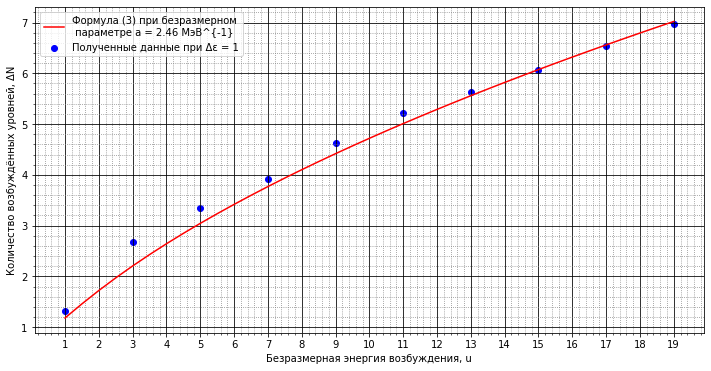

In [40]:
fig, graph = plt.subplots(figsize=(12,6))
#graph.set_title('График зависимости количества возбуждённых \n состояний в зависимости от энергии')
graph.set_xlabel('Безразмерная энергия возбуждения, u')
graph.set_ylabel('Количество возбуждённых уровней, ΔN')

graph.scatter(array1[0], array1[1], label = 'Полученные данные при Δε = 1', color = 'blue')
#graph.plot(array2[0], array2[1], label = 'Полученные данные. Δε = 2', color = 'black')
graph.plot(capote_line[0], capote_line[1], label = 'Формула (3) при безразмерном \n параметре a = 2.46 МэВ^{-1}', color = 'red')
#graph.plot(capote_line, label = 'Формула (3) при a = 6.8', color = 'red')
#graph.set(xlim=(0,10), ylim=(0,50000))

graph.xaxis.set_major_locator(ticker.MultipleLocator(1))
graph.yaxis.set_major_locator(ticker.MultipleLocator(1))
graph.grid(which='major',
        color = 'k')
graph.minorticks_on()
graph.grid(which='minor',
        color = 'gray',
        linestyle = ':')

graph.legend()

In [12]:
array_deltaE_0 = []
array_deltaE_0.append([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
array_deltaE_0.append([12,15,84,396,312,1907,3972,4170,20106,21756,45714,119673,111060,326827,501508,646005,1590492,1882847,3378244,5952504])

print(array_deltaE_0)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [12, 15, 84, 396, 312, 1907, 3972, 4170, 20106, 21756, 45714, 119673, 111060, 326827, 501508, 646005, 1590492, 1882847, 3378244, 5952504]]


In [13]:
def line(U):
    a = 6
    return (math.sqrt(math.pi)/12) * math.exp(2*math.sqrt(a*U)) / (a**(1/4) * U**(5/4))


# a = 6.8
# U = np.arange(0.1, 2, 0.1)
# #capote_line = (np.sqrt(np.pi)/12) * np.exp(2*np.sqrt(a*U)) / (a**(1/4) * U**(5/4))
# b = 2*math.sqrt(a*U)
# c = math.exp(b)
# capote_line = math.sqrt(math.pi)/12 * c / (a**(1/4) * U**(5/4))

capote_line = []
capote_line.append([])
capote_line.append([])

for i in range(39):
    capote_line[0].append(1+i/2)
    capote_line[1].append(line(1+i/2))

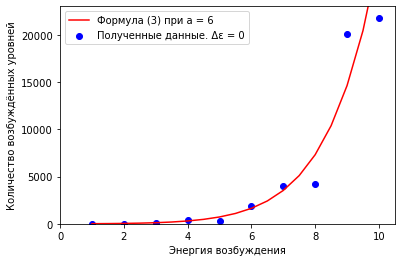

In [14]:
fig, graph = plt.subplots(figsize=(6,4))
#graph.set_title('График зависимости количества возбуждённых \n состояний в зависимости от энергии')
graph.set_xlabel('Энергия возбуждения')
graph.set_ylabel('Количество возбуждённых уровней')

graph.scatter(array_deltaE_0[0], array_deltaE_0[1], label = 'Полученные данные. Δε = 0', color = 'blue')
#graph.plot(array2[0], array2[1], label = 'Полученные данные. Δε = 2', color = 'black')
graph.plot(capote_line[0], capote_line[1], label = 'Формула (3) при a = 6', color = 'red')
#graph.plot(capote_line, label = 'Формула (3) при a = 6.8', color = 'red')
graph.set(xlim=(0,10.5), ylim=(0,23000))

graph.legend()